# Word Embeddings

Source : https://github.com/jalammar/jalammar.github.io/blob/master/notebooks/nlp/01_Exploring_Word_Embeddings.ipynb

In [1]:
import gensim.downloader as api

In [3]:
# GloVe = Stanford University
model = api.load('glove-wiki-gigaword-50')

In [4]:
model['king']

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

In [5]:
model.vectors.shape

(400000, 50)

# Visualization of Embedding Vectors

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
model['king'].reshape(1, -1)

array([[ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
        -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
        -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
        -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
         0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
         1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
         0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
        -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
        -0.64426 , -0.51042 ]], dtype=float32)

In [10]:
vec = model['king'].reshape(1, -1)
vec.shape

(1, 50)

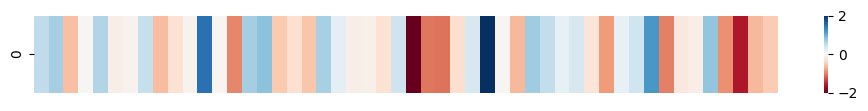

In [15]:
plt.figure(figsize=(12,1))
sns.heatmap(vec, cmap='RdBu', vmax=2, vmin=-2)
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.show()

In [18]:
def plot_embeddings(words):
    n_words = len(words)
    vectors = [model[x] for x in words]
    
    print(vectors)

In [19]:
plot_embeddings(['man', 'woman','car','jupiter'])

[array([-0.094386,  0.43007 , -0.17224 , -0.45529 ,  1.6447  ,  0.40335 ,
       -0.37263 ,  0.25071 , -0.10588 ,  0.10778 , -0.10848 ,  0.15181 ,
       -0.65396 ,  0.55054 ,  0.59591 , -0.46278 ,  0.11847 ,  0.64448 ,
       -0.70948 ,  0.23947 , -0.82905 ,  1.272   ,  0.033021,  0.2935  ,
        0.3911  , -2.8094  , -0.70745 ,  0.4106  ,  0.3894  , -0.2913  ,
        2.6124  , -0.34576 , -0.16832 ,  0.25154 ,  0.31216 ,  0.31639 ,
        0.12539 , -0.012646,  0.22297 , -0.56585 , -0.086264,  0.62549 ,
       -0.0576  ,  0.29375 ,  0.66005 , -0.53115 , -0.48233 , -0.97925 ,
        0.53135 , -0.11725 ], dtype=float32), array([-1.8153e-01,  6.4827e-01, -5.8210e-01, -4.9451e-01,  1.5415e+00,
        1.3450e+00, -4.3305e-01,  5.8059e-01,  3.5556e-01, -2.5184e-01,
        2.0254e-01, -7.1643e-01,  3.0610e-01,  5.6127e-01,  8.3928e-01,
       -3.8085e-01, -9.0875e-01,  4.3326e-01, -1.4436e-02,  2.3725e-01,
       -5.3799e-01,  1.7773e+00, -6.6433e-02,  6.9795e-01,  6.9291e-01,
       -2

In [28]:
def plot_embeddings(words):
    n_words = len(words)
    vectors = [model[x] for x in words]
    
    plt.figure(figsize=(12,n_words))
    sns.heatmap(vectors, cmap='RdBu', vmax=2, vmin=-2)
    plt.tick_params(axis='x', bottom=False, labelbottom=False)
    
    plt.show()

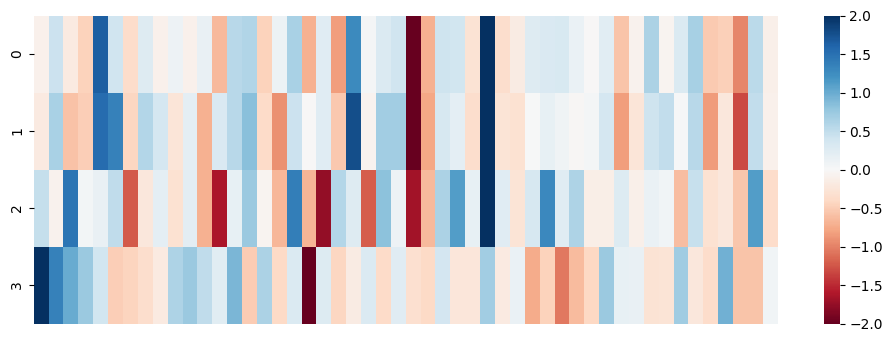

In [29]:
plot_embeddings(['man', 'woman','car','jupiter'])

In [39]:
def plot_embeddings(words):
    n_words = len(words)
    vectors = np.array([model[x] for x in words])
    
    plt.figure(figsize=(12,n_words))
    sns.heatmap(vectors, cmap='RdBu', vmax=2, vmin=-2)
    
    ax = plt.gca()
    ax.set_yticklabels(words, rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=24)
    
    plt.tick_params(axis='x', bottom=False, labelbottom=False)    
    plt.show()

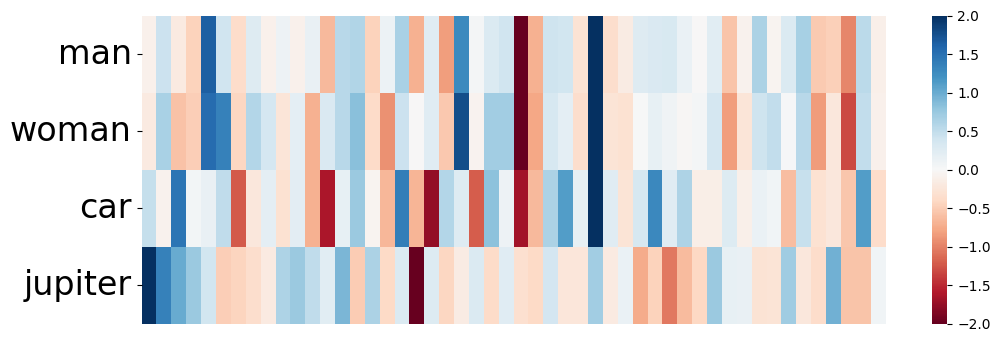

In [40]:
plot_embeddings(['man', 'woman','car','jupiter'])

# Similar Words

In [38]:
model.most_similar('dog')

[('cat', 0.9218006134033203),
 ('dogs', 0.8513158559799194),
 ('horse', 0.7907583117485046),
 ('puppy', 0.7754921317100525),
 ('pet', 0.7724707722663879),
 ('rabbit', 0.7720814347267151),
 ('pig', 0.7490062117576599),
 ('snake', 0.7399188876152039),
 ('baby', 0.7395570874214172),
 ('bite', 0.738793671131134)]

### king - man + woman = ?

In [41]:
model.most_similar(positive=['king','woman'], negative=['man'])

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.759214460849762),
 ('daughter', 0.7473882436752319),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.7214491367340088),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
vec = model['king'] - model['man'] + model['woman']
vec = vec.reshape(1,-1)

In [44]:
cosine_similarity(vec, model['queen'].reshape(1,-1))

array([[0.860958]], dtype=float32)

In [45]:
cosine_similarity(vec, model['king'].reshape(1,-1))

array([[0.8859834]], dtype=float32)

### gender bias??

In [46]:
model.most_similar(positive=['doctor','woman'], negative=['man'])

[('nurse', 0.840464174747467),
 ('child', 0.7663259506225586),
 ('pregnant', 0.7570130228996277),
 ('mother', 0.7517457604408264),
 ('patient', 0.751666247844696),
 ('physician', 0.7507280707359314),
 ('dentist', 0.7360344529151917),
 ('therapist', 0.7342537045478821),
 ('parents', 0.7286345958709717),
 ('surgeon', 0.7165213823318481)]

In [47]:
vec = model['doctor'] - model['man'] + model['woman']
vec = vec.reshape(1,-1)

In [48]:
cosine_similarity(vec, model['nurse'].reshape(1,-1))

array([[0.84242684]], dtype=float32)

In [49]:
cosine_similarity(vec, model['doctor'].reshape(1,-1))

array([[0.89598835]], dtype=float32)